# WeatherPy Solution

----
## Analysis (written description of observable trends based on the data)

* Maximum temperatures are higher near the equator (latitude is 0) compared to cities in the northern and southern hemispheres.

* There seems to be no strong relationship between latitude and humidity. However, one observation we can make is that there are few cities in the northern and southern hemispheres which have very low humidity, this does not seem to be the case near the equator.

* There is no strong relationship between latitude and cloudiness. Most cities seem to have cloudiness either between 0-20% or 70-90%.

* There is no strong relationship between latitude and wind speed. However one observation is that, for most cities wind speed ranges between 0 to 10 mph.
----

### Importing modules and Set up

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import csv
from pprint import pprint
import math
#from api_keys import api_key

import api_keys
#pprint (api_keys.api_key)

from citipy import citipy

lat_range = (-90, 90)
lng_range = (-180, 180)

### Generating Cities List 

In [19]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

598

### Building query URL and requesting results in Fahrenheit

In [20]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = url + "appid=" + api_keys.api_key + "&q="
print (query_url)
data_response = requests.get(query_url + "London")
data_json = data_response.json()
pprint (data_json)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=214cca5654bb2df47eebf5a61934a20e&q=
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1537588200,
 'id': 2643743,
 'main': {'humidity': 81,
          'pressure': 1018,
          'temp': 51.4,
          'temp_max': 53.6,
          'temp_min': 48.2},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 5091,
         'message': 0.0045,
         'sunrise': 1537595200,
         'sunset': 1537639125,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 250, 'speed': 11.41}}


### Performing API Calls

In [21]:
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
city_name = []
city_count = 0

print("Beginning Data Retrieval")
print("---------------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != 200):
        print('City not found. Skipping...')
        continue
    else:
        city_count = city_count + 1
        print('Processing Record ' + str(city_count%50) + ' of Set ' + str(math.floor(city_count/50)+1) + ' | ' + city)
        #if city_count == 52:
            #break
        
    city_name.append(response['name'])
    Cloudiness.append(response['clouds']['all'])
    Country.append(response['sys']['country'])
    Date.append(response['dt'])
    Humidity.append(response['main']['humidity'])
    Lat.append(response['coord']['lat'])
    Lng.append(response['coord']['lon'])
    Max_Temp.append(response['main']['temp_max'])
    Wind_Speed.append(response['wind']['speed'])
       
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | vila franca do campo
Processing Record 3 of Set 1 | mahebourg
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
City not found. Skipping...
Processing Record 5 of Set 1 | sergeyevka
Processing Record 6 of Set 1 | humaita
Processing Record 7 of Set 1 | joensuu
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | itarema
Processing Record 10 of Set 1 | sampit
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | albany
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | takoradi
Processing Record 17 of Set 1 | simao
City not found. Skipping...
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | kapaa
Processin

Processing Record 34 of Set 4 | lufilufi
Processing Record 35 of Set 4 | coihaique
Processing Record 36 of Set 4 | pontes e lacerda
Processing Record 37 of Set 4 | harpalpur
Processing Record 38 of Set 4 | tual
Processing Record 39 of Set 4 | kaitangata
City not found. Skipping...
Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | cidreira
City not found. Skipping...
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | jasper
Processing Record 44 of Set 4 | leh
Processing Record 45 of Set 4 | kamyshla
Processing Record 46 of Set 4 | ormara
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | thinadhoo
Processing Record 49 of Set 4 | sao filipe
Processing Record 0 of Set 5 | yaan
City not found. Skipping...
Processing Record 1 of Set 5 | zyryanka
Processing Record 2 of Set 5 | pangai
Processing Record 3 of Set 5 | coquimbo
Processing Record 4 of Set 5 | butaritari
Processing Record 5 of Set 5 | la plata
Processing Record 6 

Processing Record 12 of Set 8 | hambantota
Processing Record 13 of Set 8 | sorland
Processing Record 14 of Set 8 | nsanje
Processing Record 15 of Set 8 | hun
Processing Record 16 of Set 8 | naze
City not found. Skipping...
Processing Record 17 of Set 8 | ulaangom
Processing Record 18 of Set 8 | kabin buri
Processing Record 19 of Set 8 | verkhoyansk
Processing Record 20 of Set 8 | iqaluit
Processing Record 21 of Set 8 | batemans bay
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 8 | pacific grove
Processing Record 23 of Set 8 | talnakh
Processing Record 24 of Set 8 | chapleau
Processing Record 25 of Set 8 | wakkanai
Processing Record 26 of Set 8 | rio cuarto
Processing Record 27 of Set 8 | xining
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | quilmana
Processing Record 30 of Set 8 | san patricio
Processing Record 31 of Set 8 | catio
Processing Record 32 of Set 8 | marawi
Processing Record 33 of Set 8 | brazzaville
Processing R

### Exporting the city data into a .csv. & Displaying Output DataFrame Count

In [27]:
zipped_data = []
output_data_file = "output_data/cities.csv"
with open(output_data_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['City Name', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
    zipped_data = zip(city_name, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_Temp, Wind_Speed)
    for zip_element in zipped_data:
        csvwriter.writerow([zip_element[0], zip_element[1], zip_element[2], zip_element[3], zip_element[4], zip_element[5], zip_element[6], zip_element[7], zip_element[8]])
output_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed   
})
output_df.count()

City          526
Cloudiness    526
Country       526
Date          526
Humidity      526
Lat           526
Lng           526
Max Temp      526
Wind Speed    526
dtype: int64

### Displaying Output DataFrame

In [29]:
output_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed   
})
output_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1537585200,100,-54.81,-68.31,32.00,19.46
1,Vila Franca do Campo,20,PT,1537588800,88,37.72,-25.43,73.40,8.05
2,Mahebourg,75,MU,1537585200,83,-20.41,57.70,71.60,13.87
3,Mataura,8,NZ,1537589733,71,-46.19,168.86,62.05,6.17
4,Sergeyevka,80,KZ,1537590270,100,53.88,67.42,51.52,7.96
5,Humaita,0,AR,1537585200,67,-24.93,-65.37,68.00,5.82
6,Joensuu,0,FI,1537588200,82,62.60,29.76,62.60,12.75
7,Saldanha,0,PT,1537590300,84,41.42,-6.55,51.34,2.59
8,Itarema,0,BR,1537590300,86,-2.92,-39.92,75.82,13.78
9,Sampit,0,ID,1537590301,76,-2.54,112.95,87.07,10.31


## Plotting the Data using Scatter Plot Charts
----

### Latitude vs. Temperature Plot

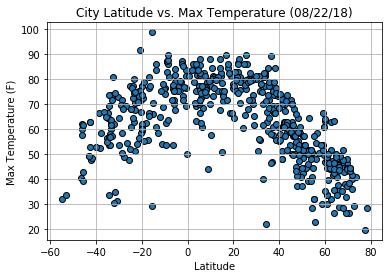

In [30]:
plt.scatter(output_df["Lat"], output_df["Max Temp"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

### Latitude vs. Humidity Plot

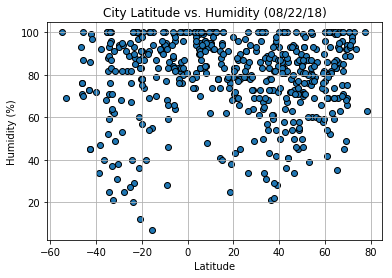

In [31]:
plt.scatter(output_df["Lat"], output_df["Humidity"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

### Latitude vs. Cloudiness Plot

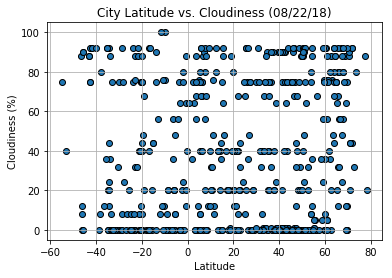

In [32]:
plt.scatter(output_df["Lat"], output_df["Cloudiness"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

### Latitude vs. Wind Speed Plot

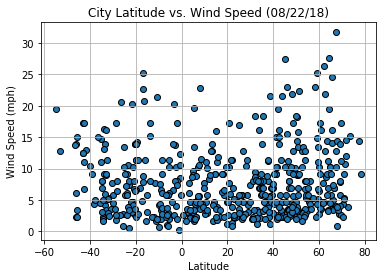

In [33]:
plt.scatter(output_df["Lat"], output_df["Wind Speed"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()